In [16]:
import layoutparser as lp
import cv2
import pytesseract
import pdf2image

In [2]:
model = lp.Detectron2LayoutModel('./model.config', 
                                 #extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"})

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
#pdf2image.convert_from_path?

In [ ]:
images = pdf2image.convert_from_path("./Service Contract Template.pdf",output_folder="./Service-Contract-Template",fmt="jpg",output_file="page")

In [59]:
image_file = "./Service-Contract-Template/page0001-05.jpg"

In [60]:
image = cv2.imread(image_file)
image = image[..., ::-1] 
    # Convert the image from BGR (cv2 default loading style)
    # to RGB

In [61]:
output = model.detect(image)

/mnt/d/miniconda3/envs/lpenv/lib/python3.9/site-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [65]:
#output

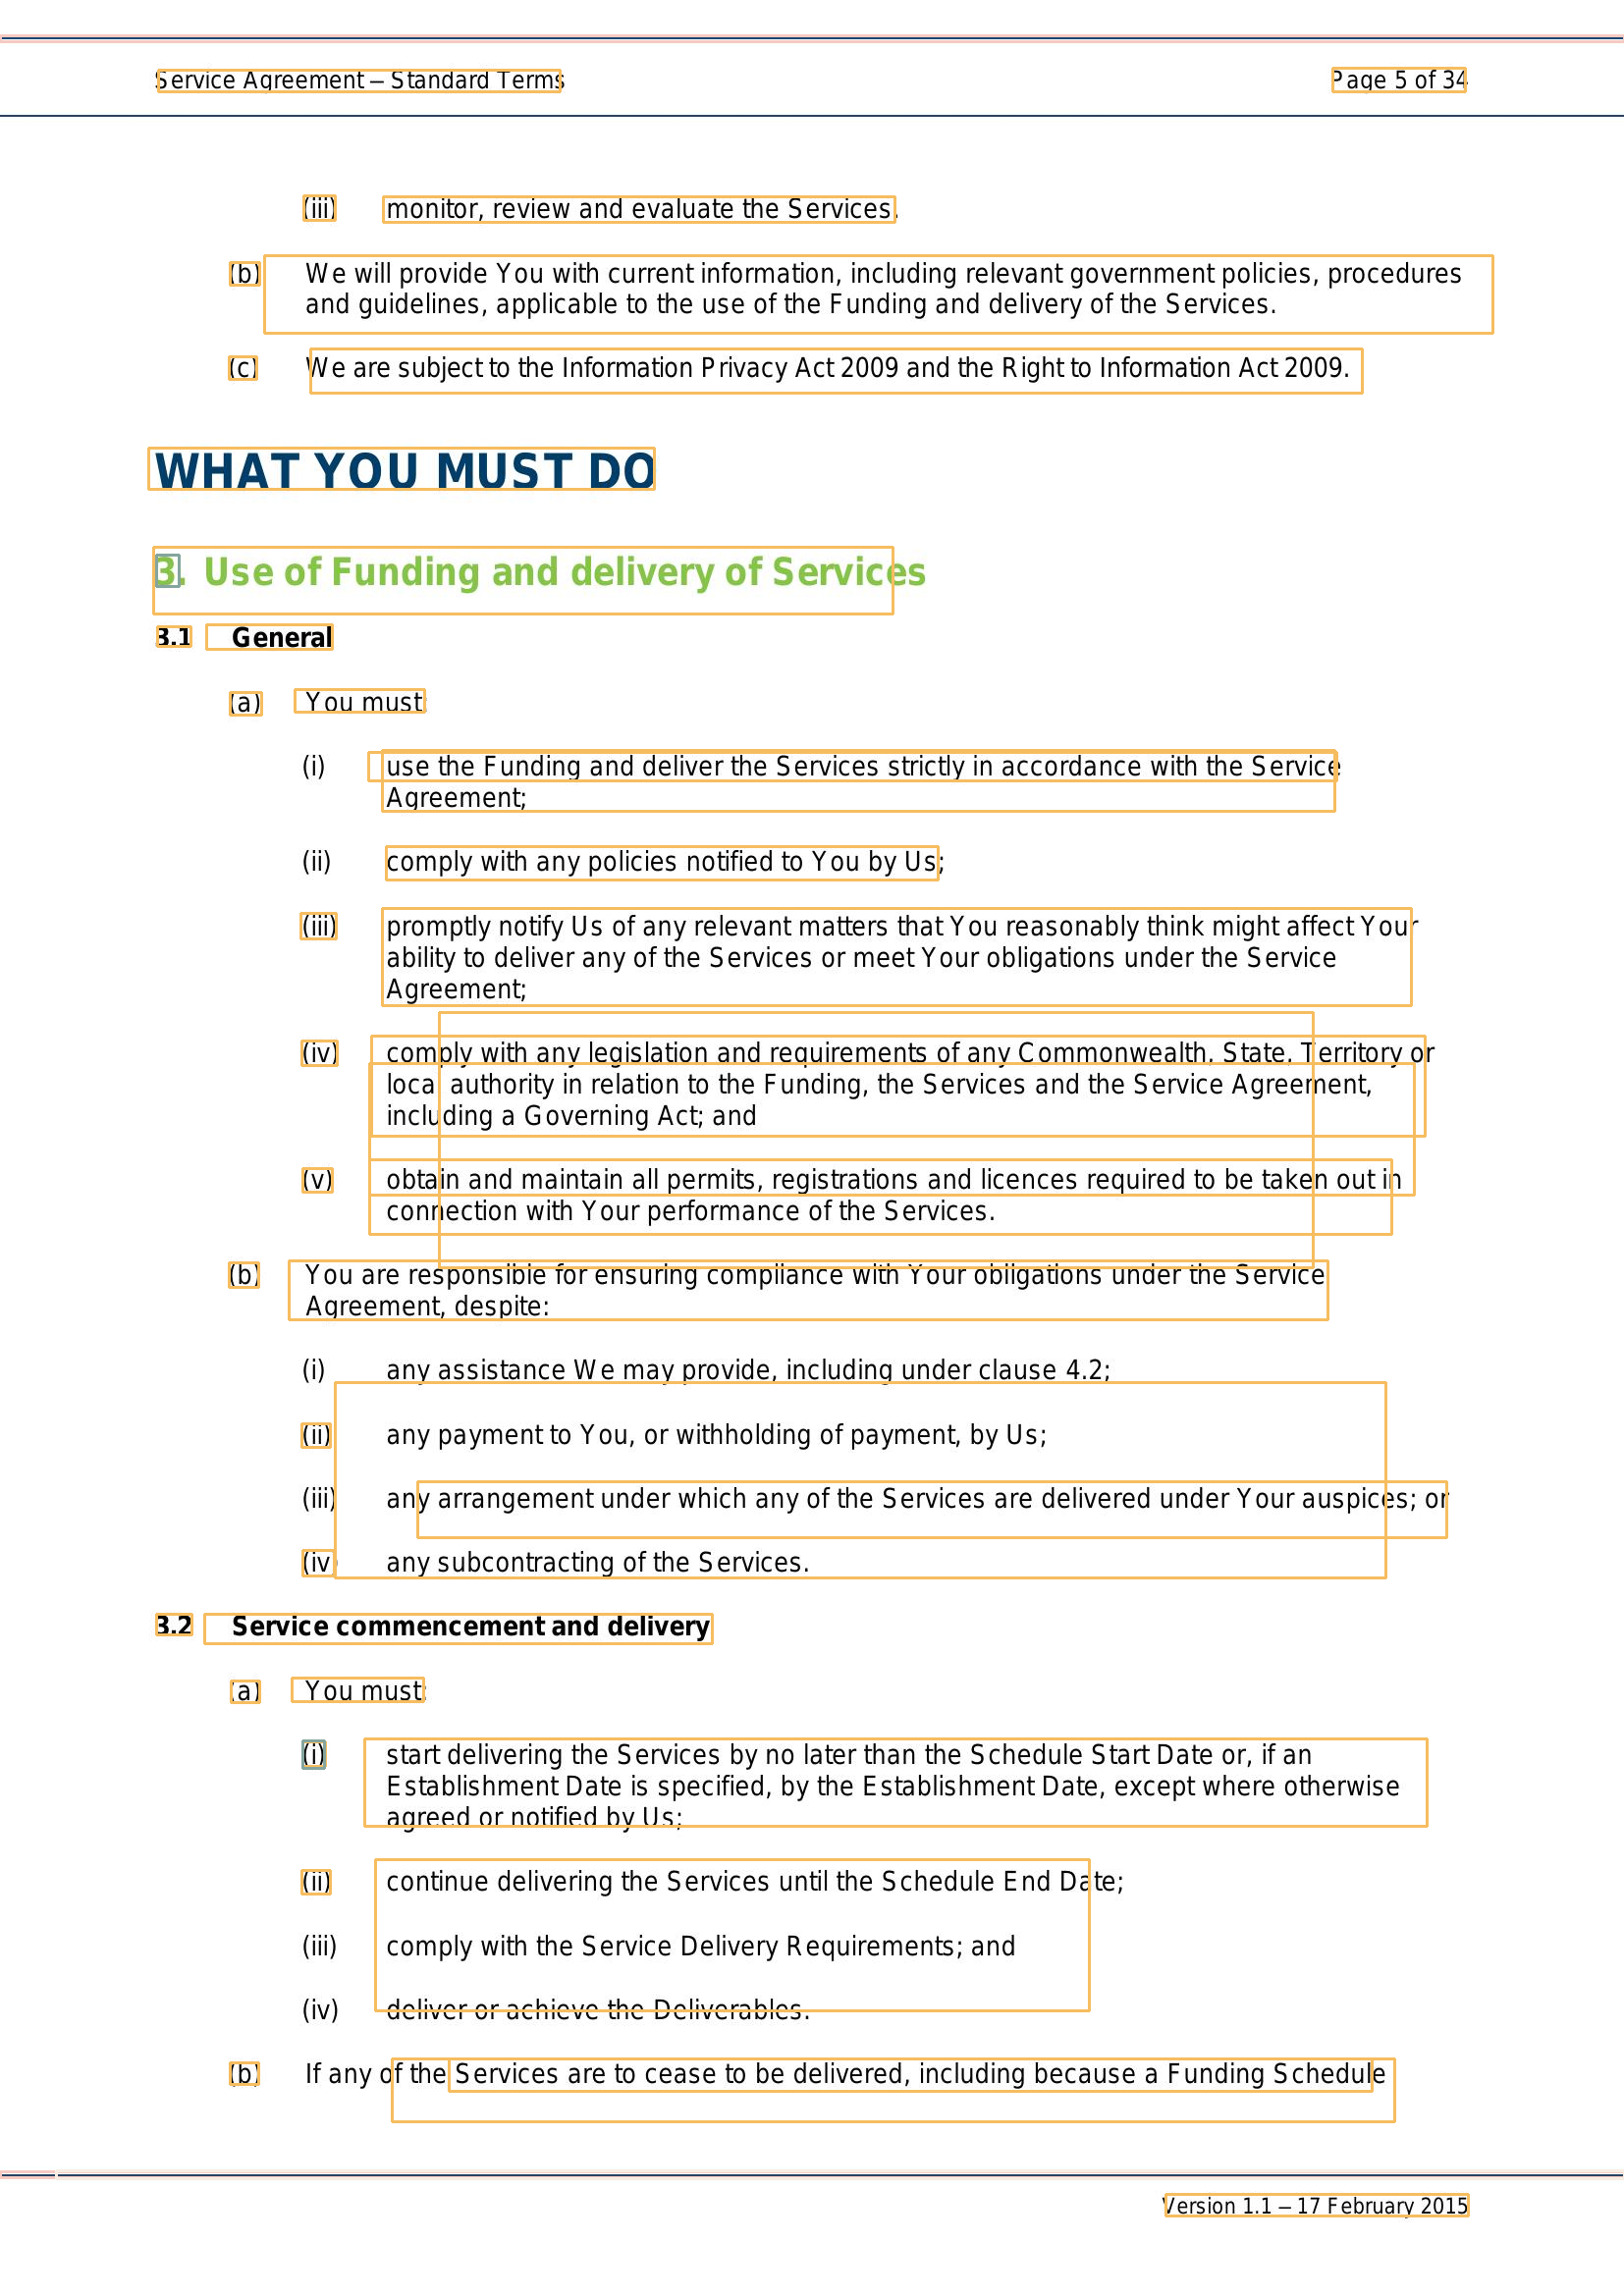

In [63]:
lp.draw_box(image, output, box_width=3)

In [64]:
type(output._blocks[1].block)

layoutparser.elements.layout_elements.Rectangle

In [71]:
block.coordinates[0]

447.5712890625

In [77]:
text_blocks = [block for block in output._blocks]
text_blocks.sort(key=lambda x: x.coordinates[0])
text_blocks.sort(key=lambda x: x.coordinates[1])

TextBlock(block=Rectangle(x_1=0.0, y_1=36.08311462402344, x_2=1654.0, y_2=42.727088928222656), text=None, id=None, type=SeparatorRegion, parent=None, next=None, score=0.28257736563682556)

In [78]:
for block in text_blocks:
    #if isinstance(block,lp.elements.layout_elements.TextBlock) or isinstance(block,lp.elements.layout_elements.TextRegion):
    (x1,y1,x2,y2) = block.coordinates
    x = int(x1)
    y = int(y1)
    w = int(x2-x1)
    h = int(y2-y1)
    #print(x,y,w,h)

    image = cv2.imread(image_file, 0)
    thresh = 255 - cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    ROI = thresh[y:y + h, x:x + w]
    data = pytesseract.image_to_string(ROI, lang='eng',config='--psm 6')
    print(data)
    print("*"*50)


**************************************************
Page 5 of 34

**************************************************
service Agreement — Standard Term:

**************************************************
{ iii)

**************************************************
monitor, review and evaluate the Services

**************************************************
We will provide You with current information, including relevant government policies, procedures
and guidelines, applicable to the use of the Funding and delivery of the Services.

**************************************************
(D)

**************************************************
Ne are subject to the Information Privacy Act 2009 and the Right to Information Act 2009.

**************************************************
(C]

**************************************************
WHAT YOU MUST DO

**************************************************

**************************************************

***********************

In [46]:
#output._blocks

In [47]:
text_blocks = [x for x in output._blocks if isinstance(x,lp.elements.layout_elements.TextBlock) or (x,lp.elements.layout_elements.TextRegion)]

In [48]:
len(text_blocks)

23

In [51]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = output.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)
# The b.coordinates[1] corresponds to the y coordinate of the region
# sort based on that can simulate the top-to-bottom reading order 
right_blocks = lp.Layout([b for b in text_blocks if b not in left_blocks])
right_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)

# And finally combine the two lists and add the index
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [52]:
text_blocks = lp.Layout([b for b in output if b.type=='Text'])
figure_blocks = lp.Layout([b for b in output if b.type=='Figure'])

In [53]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [55]:
left_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=94.08776092529297, y_1=30.55307960510254, x_2=427.48394775390625, y_2=72.78815460205078), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.9998037219047546), TextBlock(block=Rectangle(x_1=120.22264099121094, y_1=132.2736053466797, x_2=1595.6209716796875, y_2=188.35975646972656), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.5261499881744385), TextBlock(block=Rectangle(x_1=93.47782897949219, y_1=138.8861083984375, x_2=425.4670715332031, y_2=186.6824188232422), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.9997074007987976), TextBlock(block=Rectangle(x_1=98.2490005493164, y_1=203.17079162597656, x_2=745.9255981445312, y_2=299.31005859375), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.997749388217926), TextBlock(block=Rectangle(x_1=95.26505279541016, y_1=339.92193603515625, x_2=801.9073486328125, y_2=926.7190551757812), text=None, id=None, type=TextRegion

In [54]:
len(text_blocks)

0

In [ ]:
#lp.draw_box(image,text_blocks,box_width=3)

In [ ]:
block.coordinates

In [ ]:
813-100,579-211

In [ ]:
#data = pytesseract.image_to_string(image, lang='eng',config='--psm 6')
#print(data)